## Supervised Learning - Building a Student Performance Classification System


#### The aim of this project is to predict how likely a student is to pass. 

This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploring the Data

## Question 1 - Read Dataset, Print Columns and Drop missing values


#### Answer:

#In case you are working in Google Colab, Upload the csv file to colab.
from google.colab import files

uploaded = files.upload()

In [2]:
from google.colab import files

uploaded = files.upload()

Saving students-data.csv to students-data.csv


In [3]:
# Read dataset using pandas and print few rows
# Hint: Read the dataset file using pandas.read_csv(). Take care about the delimiter.
df=pd.read_csv("students-data.csv",delimiter=';')
df_plot=pd.read_csv("students-data.csv",delimiter=';')
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  .

In [4]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(395, 33)


In [5]:
# Print the columns in the dataframe
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# Drop missing values
# Hint: Set the index name of the dataframe to "number". Check sample of data to drop if any missing values are there
df.isnull().sum()
df.index.name = 'number'

In [7]:
df.index.name

'number'

In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Transform Data

## Question 2 - Print all the attribute names which are not numerical.

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [9]:
df.select_dtypes(exclude=['int','float'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no


## Question 3 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
df.var()


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [11]:
df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],inplace=True,axis=1)

In [12]:
df.shape

(395, 27)

In [13]:
df.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [14]:
from sklearn.preprocessing import LabelEncoder

df_cat=(df.select_dtypes(exclude=['int','float'])).apply(LabelEncoder().fit_transform)

In [15]:
df_num=df.select_dtypes(include=['int','float'])

In [16]:
df=pd.concat([df_num,df_cat],axis=1)

In [17]:
df.head(10)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,15,15,15,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,12,12,11,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,6,5,6,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,16,18,19,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


In [18]:
df.dtypes

age           int64
Medu          int64
Fedu          int64
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
school        int64
sex           int64
address       int64
famsize       int64
Pstatus       int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
dtype: object

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [19]:
conditions =[(df['G1']>=10)]
choices = [1]
df['G1'] = np.select(conditions, choices, default=0)
conditions =[(df['G2']>=10)]
choices = [1]
df['G2'] = np.select(conditions, choices, default=0)
conditions =[(df['G3']>=10)]
choices = [1]
df['G3'] = np.select(conditions, choices, default=0)


  

In [20]:
df.head(10)


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,1,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,1,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,1,1,1,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,1,1,1,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,0,0,0,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,1,1,1,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


In [21]:
df.dtypes

age           int64
Medu          int64
Fedu          int64
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
school        int64
sex           int64
address       int64
famsize       int64
Pstatus       int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
dtype: object

## Apply the models.

## Question 6 - Separate Feature and Target
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [22]:
# Target values are G3
df_Traget=df['G3']

# Feature set is remaining features
df_Features=df.drop('G3',axis=1)

In [23]:
df_Traget

number
0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

In [24]:
df_Features

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,4,5,4,11,0,0,1,1,1,1,0,3,3,0,2,0,1,1,0,1,1,0,0
391,17,3,1,5,4,2,3,1,1,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,21,1,1,3,3,3,3,1,0,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0


## Visualization

## Question 7 - Plot G2 and G3 and give your understanding on relation between both variables.

* Hint:Bar plot to compare counts of '0' and '1' in G2 and G3

AxesSubplot(0.125,0.125;0.775x0.755)
1    249
0    146
Name: G2, dtype: int64


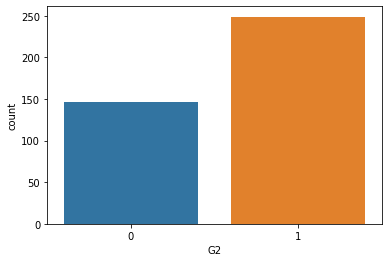

In [25]:
print(sns.countplot(df['G2']))
print(df['G2'].value_counts())

AxesSubplot(0.125,0.125;0.775x0.755)
1    265
0    130
Name: G3, dtype: int64


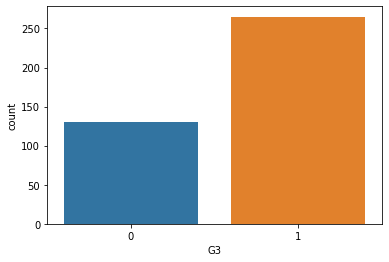

In [26]:
print(sns.countplot(df['G3']))
print(df['G3'].value_counts())


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8 - Plot the number of students in each school and number of students with different ages in separate plots.

* Hint: Bar plots using unique value counts

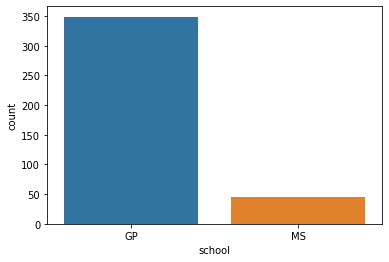

In [27]:
sns.countplot(df_plot['school'])

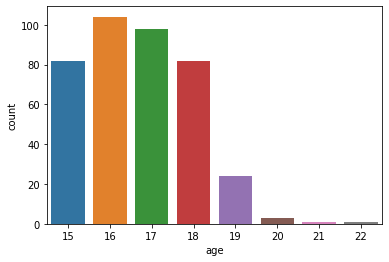

In [28]:
sns.countplot(df_plot['age'])

## Question 9 - Training and Testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [29]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = 95

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(df_Features, df_Traget,train_size=num_train,test_size=num_test, random_state=42)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Logistic Regression

In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


0.9310344827586207
0.9157894736842105


Naive Bayes Classifier

In [32]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.9298245614035088
0.9157894736842105


K-neighbours Classifier

In [39]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.8142857142857143
0.7263157894736842
